In [1]:
#based on chapter 6

In [2]:
import numpy as np
import pandas as pd

In [3]:
#data for a dataframe can be list, tuple,ndarray,dict
#index can be numbers,strings, time info
df = pd.DataFrame([10,20,30,40] , columns = ['numbers'],index = ['a','b','c','d'])

In [4]:
df

,numbers
a,10
b,20
c,30
d,40


In [5]:
df.index

Index([u'a', u'b', u'c', u'd'], dtype='object')

In [6]:
df.columns

Index([u'numbers'], dtype='object')

In [7]:
#ix is deprecated
print(df.ix['c'])
#use loc for label based indexing
print(df.loc['c'])
#use iloc for number based indexing
print(df.iloc[2])

numbers    30
Name: c, dtype: int64
numbers    30
Name: c, dtype: int64
numbers    30
Name: c, dtype: int64


/home/cassandra/Shikha/pythonvirtual/lib/python2.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [8]:
df.loc[['a','d']]

,numbers
a,10
d,40


In [9]:
df.loc[df.index[1:3]]

,numbers
b,20
c,30


In [10]:
df.iloc[1:3]

,numbers
b,20
c,30


In [11]:
#sum per column
df.sum()

numbers    100
dtype: int64

In [12]:
df.apply(lambda x : x**2)

,numbers
a,100
b,400
c,900
d,1600


In [13]:
df

,numbers
a,10
b,20
c,30
d,40


In [14]:
df ** 2

,numbers
a,100
b,400
c,900
d,1600


In [15]:
df

,numbers
a,10
b,20
c,30
d,40


In [16]:
df['floats'] = (1.5,2.5,3.5,4.5)

In [17]:
df

,numbers,floats
a,10,1.5
b,20,2.5
c,30,3.5
d,40,4.5


In [18]:
df['floats']

a    1.5
b    2.5
c    3.5
d    4.5
Name: floats, dtype: float64

In [19]:
df['names'] = pd.DataFrame(['Yves','Guido','Felix','Francesc'],index = ['d','a','b','c'])
df

,numbers,floats,names
a,10,1.5,Guido
b,20,2.5,Felix
c,30,3.5,Francesc
d,40,4.5,Yves


In [20]:
df.append({'numbers':100 ,'floats':5.75,'names':'Henry'},ignore_index=True)

,numbers,floats,names
0,10,1.50,Guido
1,20,2.50,Felix
2,30,3.50,Francesc
3,40,4.50,Yves
4,100,5.75,Henry


In [21]:
df = df.append(pd.DataFrame({'numbers':100 ,'floats':5.75,'names':'Henry'},
               index=['z']))

In [22]:
df

,floats,names,numbers
a,1.50,Guido,10
b,2.50,Felix,20
c,3.50,Francesc,30
d,4.50,Yves,40
z,5.75,Henry,100


In [23]:
df.join(pd.DataFrame([1,4,9,16,25],index=['a','b','c','d','y'],columns=['squares']))

,floats,names,numbers,squares
a,1.50,Guido,10,1.0
b,2.50,Felix,20,4.0
c,3.50,Francesc,30,9.0
d,4.50,Yves,40,16.0
z,5.75,Henry,100,NaN


In [24]:
df = df.join(pd.DataFrame([1,4,9,16,25],index=['a','b','c','d','y'],
                         columns=['squares',]),
            how='outer')

In [25]:
df

,floats,names,numbers,squares
a,1.50,Guido,10.0,1.0
b,2.50,Felix,20.0,4.0
c,3.50,Francesc,30.0,9.0
d,4.50,Yves,40.0,16.0
y,NaN,NaN,NaN,25.0
z,5.75,Henry,100.0,NaN


In [26]:
#NaN are not taken as zero. they are ignored. 
#here sum is divided by 5 and not 6
df[['numbers','squares']].mean()

numbers    40.0
squares    11.0
dtype: float64

In [27]:
df[['numbers','squares']].std()

numbers    35.355339
squares     9.669540
dtype: float64

In [28]:
a = np.random.standard_normal((9,4))
a.round(6)

array([[ 0.378762,  0.118042, -0.88976 ,  0.310956],
       [-1.16272 , -1.178882, -0.806541, -1.438114],
       [ 0.573035,  0.502724, -1.210381,  0.293533],
       [ 1.336942,  0.390746,  0.869249,  1.195246],
       [-0.399057,  0.62894 , -0.986798,  0.030515],
       [-0.365483,  0.349354,  0.417874, -0.227631],
       [ 0.552234,  0.043838, -0.010772,  0.386442],
       [ 0.682659, -0.486802, -1.096186,  0.090047],
       [ 0.744227,  1.062255,  1.08772 ,  1.156347]])

In [29]:
df = pd.DataFrame(a)
df

,0,1,2,3
0,0.378762,0.118042,-0.889760,0.310956
1,-1.162720,-1.178882,-0.806541,-1.438114
2,0.573035,0.502724,-1.210381,0.293533
3,1.336942,0.390746,0.869249,1.195246
4,-0.399057,0.628940,-0.986798,0.030515
5,-0.365483,0.349354,0.417874,-0.227631
6,0.552234,0.043838,-0.010772,0.386442
7,0.682659,-0.486802,-1.096186,0.090047
8,0.744227,1.062255,1.087720,1.156347


In [30]:
#ATTENTION : in the book he uses double brackets : df.columns=[['No1','No2','No3','No4']]
#DO NOT do this. this creates multi level indexing. stuff like groupby wont work
df.columns=['No1','No2','No3','No4']
df

,No1,No2,No3,No4
0,0.378762,0.118042,-0.889760,0.310956
1,-1.162720,-1.178882,-0.806541,-1.438114
2,0.573035,0.502724,-1.210381,0.293533
3,1.336942,0.390746,0.869249,1.195246
4,-0.399057,0.628940,-0.986798,0.030515
5,-0.365483,0.349354,0.417874,-0.227631
6,0.552234,0.043838,-0.010772,0.386442
7,0.682659,-0.486802,-1.096186,0.090047
8,0.744227,1.062255,1.087720,1.156347


In [31]:
#TODO : throws error, although in book it is given as working
#df['No2'][3]

In [32]:
dates = pd.date_range('2015-1-1',periods=9,freq='M')

In [33]:
#TODO : we gave 1 jan as an argument . 
#how does it know to take last dates of month as indices??

#how to make indices take first of each month (MS), or say 15 of each month?
dates

DatetimeIndex(['2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30',
               '2015-05-31', '2015-06-30', '2015-07-31', '2015-08-31',
               '2015-09-30'],
              dtype='datetime64[ns]', freq='M')

In [34]:
df.index=dates

In [35]:
df

,No1,No2,No3,No4
2015-01-31,0.378762,0.118042,-0.889760,0.310956
2015-02-28,-1.162720,-1.178882,-0.806541,-1.438114
2015-03-31,0.573035,0.502724,-1.210381,0.293533
2015-04-30,1.336942,0.390746,0.869249,1.195246
2015-05-31,-0.399057,0.628940,-0.986798,0.030515
2015-06-30,-0.365483,0.349354,0.417874,-0.227631
2015-07-31,0.552234,0.043838,-0.010772,0.386442
2015-08-31,0.682659,-0.486802,-1.096186,0.090047
2015-09-30,0.744227,1.062255,1.087720,1.156347


In [36]:
np.array(df).round(6)

array([[ 0.378762,  0.118042, -0.88976 ,  0.310956],
       [-1.16272 , -1.178882, -0.806541, -1.438114],
       [ 0.573035,  0.502724, -1.210381,  0.293533],
       [ 1.336942,  0.390746,  0.869249,  1.195246],
       [-0.399057,  0.62894 , -0.986798,  0.030515],
       [-0.365483,  0.349354,  0.417874, -0.227631],
       [ 0.552234,  0.043838, -0.010772,  0.386442],
       [ 0.682659, -0.486802, -1.096186,  0.090047],
       [ 0.744227,  1.062255,  1.08772 ,  1.156347]])

In [37]:
df.sum()

No1    2.340600
No2    1.430214
No3   -2.625595
No4    1.797341
dtype: float64

In [38]:
df.mean()

No1    0.260067
No2    0.158913
No3   -0.291733
No4    0.199705
dtype: float64

In [39]:
#TODO : how to get rowwise cumsum?
df.cumsum()

,No1,No2,No3,No4
2015-01-31,0.378762,0.118042,-0.889760,0.310956
2015-02-28,-0.783958,-1.060840,-1.696301,-1.127158
2015-03-31,-0.210922,-0.558116,-2.906682,-0.833624
2015-04-30,1.126020,-0.167370,-2.037433,0.361622
2015-05-31,0.726963,0.461569,-3.024231,0.392137
2015-06-30,0.361480,0.810923,-2.606357,0.164506
2015-07-31,0.913713,0.854762,-2.617130,0.550948
2015-08-31,1.596373,0.367959,-3.713315,0.640994
2015-09-30,2.340600,1.430214,-2.625595,1.797341


In [40]:
df.describe()

,No1,No2,No3,No4
count,9.000000,9.000000,9.000000,9.000000
mean,0.260067,0.158913,-0.291733,0.199705
std,0.759945,0.658286,0.896527,0.780067
min,-1.162720,-1.178882,-1.210381,-1.438114
25%,-0.365483,0.043838,-0.986798,0.030515
50%,0.552234,0.349354,-0.806541,0.293533
75%,0.682659,0.502724,0.417874,0.386442
max,1.336942,1.062255,1.087720,1.195246


In [41]:
np.sqrt(abs(df))

,No1,No2,No3,No4
2015-01-31,0.615436,0.343572,0.943271,0.557634
2015-02-28,1.078295,1.085763,0.898076,1.199214
2015-03-31,0.756991,0.709030,1.100173,0.541787
2015-04-30,1.156262,0.625097,0.932335,1.093273
2015-05-31,0.631709,0.793057,0.993377,0.174686
2015-06-30,0.604552,0.591062,0.646432,0.477107
2015-07-31,0.743124,0.209375,0.103790,0.621644
2015-08-31,0.826232,0.697712,1.046989,0.300078
2015-09-30,0.862686,1.030657,1.042938,1.075336


In [42]:
np.sqrt(df).sum()

/home/cassandra/Shikha/pythonvirtual/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


No1    4.960732
No2    4.301851
No3    2.621705
No4    4.364439
dtype: float64

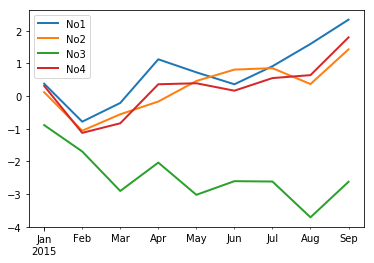

In [43]:
%matplotlib inline
df.cumsum().plot(lw=2.0)

In [44]:
type(df)

pandas.core.frame.DataFrame

In [45]:
df['No1']

2015-01-31    0.378762
2015-02-28   -1.162720
2015-03-31    0.573035
2015-04-30    1.336942
2015-05-31   -0.399057
2015-06-30   -0.365483
2015-07-31    0.552234
2015-08-31    0.682659
2015-09-30    0.744227
Freq: M, Name: No1, dtype: float64

In [46]:
#TODO : this gives type as dataframe rather than series
type(df['No1'])

pandas.core.series.Series

In [47]:
abc = df['No1']
type(abc)

pandas.core.series.Series

In [48]:
import matplotlib.pyplot as plt


Text(0,0.5,u'value')

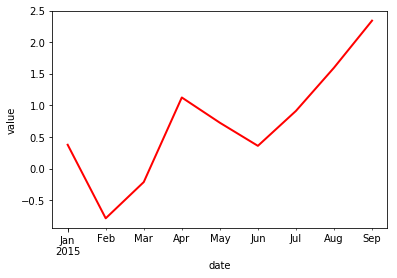

In [49]:
df['No1'].cumsum().plot(style='r',lw=2.)
plt.xlabel('date')
plt.ylabel('value')

In [50]:
df['Quarter'] = ['Q1', 'Q1','Q1','Q2','Q2','Q2','Q3','Q3','Q3']

In [51]:
df

,No1,No2,No3,No4,Quarter
2015-01-31,0.378762,0.118042,-0.889760,0.310956,Q1
2015-02-28,-1.162720,-1.178882,-0.806541,-1.438114,Q1
2015-03-31,0.573035,0.502724,-1.210381,0.293533,Q1
2015-04-30,1.336942,0.390746,0.869249,1.195246,Q2
2015-05-31,-0.399057,0.628940,-0.986798,0.030515,Q2
2015-06-30,-0.365483,0.349354,0.417874,-0.227631,Q2
2015-07-31,0.552234,0.043838,-0.010772,0.386442,Q3
2015-08-31,0.682659,-0.486802,-1.096186,0.090047,Q3
2015-09-30,0.744227,1.062255,1.087720,1.156347,Q3


In [52]:
groups=df.groupby('Quarter')

In [53]:
groups.mean()

,No1,No2,No3,No4
Quarter,,,,
Q1,-0.070307,-0.186039,-0.968894,-0.277875
Q2,0.190801,0.456347,0.100108,0.332710
Q3,0.659707,0.206430,-0.006413,0.544279


In [54]:
groups.max()

,No1,No2,No3,No4
Quarter,,,,
Q1,0.573035,0.502724,-0.806541,0.310956
Q2,1.336942,0.628940,0.869249,1.195246
Q3,0.744227,1.062255,1.087720,1.156347


In [55]:
groups.size()

Quarter
Q1    3
Q2    3
Q3    3
dtype: int64

In [56]:
groups.describe()

No1                                                              \
        count      mean       std       min       25%       50%       75%   
Quarter                                                                     
Q1        3.0 -0.070307  0.951030 -1.162720 -0.391979  0.378762  0.475899   
Q2        3.0  0.190801  0.992729 -0.399057 -0.382270 -0.365483  0.485729   
Q3        3.0  0.659707  0.098033  0.552234  0.617447  0.682659  0.713443   

                    No2              ...          No3             No4  \
              max count      mean    ...          75%       max count   
Quarter                              ...                                
Q1       0.573035   3.0 -0.186039    ...    -0.848151 -0.806541   3.0   
Q2       1.336942   3.0  0.456347    ...     0.643561  0.869249   3.0   
Q3       0.744227   3.0  0.206430    ...     0.538474  1.087720   3.0   

                                                                               
             mean       std       min       25%       50%       75%       max  
Quarter                                                                        
Q1      -0.277875  1.004834 -1.438114 -0.572290  0.293533  0.302245  0.310956  
Q2       0.332710  0.758048 -0.227631 -0.098558  0.030515  0.612881  1.195246  
Q3       0.544279  0.550394  0.090047  0.238244  0.386442  0.771394  1.156347  

[3 rows x 32 columns]

In [57]:
df['Odd_Even'] = ['Odd','Even' ,'Odd','Even' ,'Odd','Even' ,'Odd','Even' ,'Odd']

In [58]:
groups = df.groupby(['Quarter','Odd_Even'])

In [59]:
groups.size()

Quarter  Odd_Even
Q1       Even        1
         Odd         2
Q2       Even        2
         Odd         1
Q3       Even        1
         Odd         2
dtype: int64

In [60]:
groups.mean()

No1       No2       No3       No4
Quarter Odd_Even                                        
Q1      Even     -1.162720 -1.178882 -0.806541 -1.438114
        Odd       0.475899  0.310383 -1.050071  0.302245
Q2      Even      0.485729  0.370050  0.643561  0.483807
        Odd      -0.399057  0.628940 -0.986798  0.030515
Q3      Even      0.682659 -0.486802 -1.096186  0.090047
        Odd       0.648230  0.553046  0.538474  0.771394